In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("../Resources/new_all_data2.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df = df.drop(['ISO_Code_x'], axis = 1)
df.head()

,Country,2010_DR,2011_DR,2012_DR,2013_DR,2014_DR,2015_DR,2016_DR,2017_DR,2018_DR,...,2011_WAE,2012_WAE,2013_WAE,2014_WAE,2015_WAE,2016_WAE,2017_WAE,2018_WAE,2019_WAE,2020_WAE
0,Albania,54.0,53.5,53.0,52.6,52.1,51.6,51.1,50.6,50.1,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
1,Angola,99.7,99.3,102.0,105.0,108.0,111.0,114.0,117.0,119.0,...,46.3,46.3,46.3,46.3,46.3,46.3,46.3,46.3,46.3,46.3
2,Armenia,43.8,44.5,45.2,45.9,46.5,47.2,47.9,48.6,49.3,...,15.3,16.4,17.5,18.7,19.8,20.9,22.1,23.2,24.4,25.5
3,Azerbaijan,50.9,50.9,50.9,50.9,50.9,50.9,50.9,50.9,50.9,...,17.9,17.9,17.9,17.9,17.9,17.9,17.9,17.9,17.9,17.9
4,Bangladesh,68.5,67.8,66.3,64.9,63.4,61.8,60.2,58.5,56.9,...,7.1,19.3,31.6,43.8,56.0,68.3,80.5,92.7,105.0,117.0


In [3]:

X = df.drop(['GNI/C 2020','Country'], axis = 1)

y = df['GNI/C 2020'].values.reshape(-1,1)

print(X.shape,y.shape)


(68, 162) (68, 1)


# Create a Train Test Split



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)




In [5]:
from sklearn.neighbors import KNeighborsRegressor 
model = KNeighborsRegressor(n_neighbors=5)


model.fit(X_train, y_train)



training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6582947642818731
Testing Score: 0.4608508364842223


Text(0.5, 1.0, 'Residual Plot')

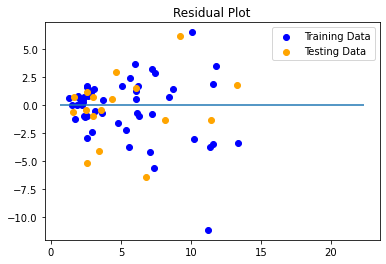

In [6]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")